## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [922]:
# Importing all the necessary datasets required for data analysis Pandas,numpy,and matplotlib,seaborn for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [923]:
# Importing data set and storing into the variable 
playstore_data=pd.read_csv("Play Store Data.csv")


# Basic steps
1. Head of the dataset
2. Dataset shape
3. Check data type of every column
4. print descriptive summary

In [924]:
# printing the first 5 rows in the dataset
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [925]:
# Printing the shape of the dataset
playstore_data.shape

(10841, 13)

In [926]:
# Printing the information of dataset to get the better idea about the datatype and memory used
playstore_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.3 MB


In [927]:
# Printing the descriptive statistics
playstore_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Right now when we try to look at the descriptive statistics of the play store data set,
 - We see only one numerical column from describe function
 
## We need to figure out the columns that can be numerical 
## They are
 - Rating
 - Reviews
 - Size
 - Installs
 - Price
 
 
 ***Out of all the columns only Rating column in numerical***
 
 So we will start converting all the left out column's data type to numerical (int or float)

## 1. Conversion of Column:Reviews from object to float type

In [928]:
# Printing the data type of Reviews 
playstore_data["Reviews"].dtype

dtype('O')

- Direct conversion of Reviews column may get some error if column contains any alphabets and special characters
- So in order to check we can use [isnumeric](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isnumeric.html) function ***(to check if it contains only digits or not)***  to determine the no of rows having irregular data for conversion 

In [929]:
playstore_data[~ playstore_data["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [930]:
# The category, Rating and Reviews Column have irregular data so i'am dropping this row having an index 10472
print(playstore_data.shape)
playstore_data.drop(10472,inplace=True)
playstore_data.shape

(10841, 13)


(10840, 13)

In [931]:
# Converting the values from object to float
print(playstore_data["Reviews"].dtype)
playstore_data["Reviews"]=playstore_data["Reviews"].astype('int64')
playstore_data["Reviews"].dtype

object


dtype('int64')

# 2. Conversion of Column :size from object to float
 - By looking at the unique data present in the ***size***  column  we have <br>
      1. Numbers like 8M , 10M etc which denotes that these data have MegaBytes as its unit <br>
      2. Numbers like 8.5k,23k,1020k etc which denotes that these data have Kilobytes as unit
      
      
 - So here lets convert all the units to Kilobyte for data analysis
 

In [932]:
# Printing the data which have decimal values like 3.1M 2.7M which contains dot ( . )
playstore_data[playstore_data["Size"].str.find(".")!=-1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [933]:
playstore_data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [934]:
# Creating a function to convert the all size to kilobyte units
def convert_to_kilobytes(size):
#     If the data is telling us the size varies with time then lets assign nan values to it
    if size == "Varies with device":
        return np.nan
#     If the data contains M it remmoves M convert it to float and it will be multiplied to float
    elif "M" in size:
        size=size.replace("M","")
        size=float(size)
        return round(size * 1000,2)
#     If the data contains K it remmoves k convert it to float 
    elif "k" in size:
        size=size.replace("k","")
        return round(float(size),2)

# Checking all the usecases of size conversion
convert_to_kilobyrtes('456.6656545465M')\
,convert_to_kilobyrtes('456.34k'),\
convert_to_kilobyrtes('456M'),\
convert_to_kilobyrtes('45.6M')

(456665.65, 456.34, 456000.0, 45600.0)

In [935]:
values=playstore_data["Size"].apply(convert_to_kilobyrtes)
# checking if all rows are affecting 
values.shape

(10840,)

In [936]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [937]:
# Converting the sizes to kilobyte unit
playstore_data.Size=playstore_data.Size.apply(convert_to_kilobytes)

In [938]:
playstore_data.Size.dtype

dtype('float64')

In [939]:
# Checking the head of size conversion
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 3. Conversion of Column : Installs to integer

 - The data contains string like '+' and ',' need to remove that and convert it into int type

In [940]:
# So here we have + and , to be removed in order to convert into into integer data type
playstore_data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [941]:
# regex logic used 
pattern=r'[+,]'
# use cases of Removing + and , from stirng
re.sub(pattern,'',"10,000+"),re.sub(pattern,'',"10,00,000+")

('10000', '1000000')

In [942]:
# Replacing the + and , from string
pattern=r'[+,]'
playstore_data.Installs=playstore_data.Installs.apply(lambda x: re.sub(pattern,'',x) )

In [943]:
# Checking if all the unique numbers are appropraite to convert it into int 
playstore_data.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [944]:
# Conversion from Object to integer data type
playstore_data.Installs=playstore_data.Installs.astype("int64")
playstore_data.Installs.dtype

dtype('int64')

# 4. Conversion of column :Price from Object to float
 - It contains only dollar symbol ***'$'***
 
 - Remove  the ***$*** symbol
 - Convert the type to float


In [945]:
# There are 92 unique values
playstore_data.Price.unique(),playstore_data.Price.unique().shape

(array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
        '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
        '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
        '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
        '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
        '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
        '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
        '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
        '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
        '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
        '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
        '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
        '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
        '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object),
 (9

In [946]:
playstore_data.Price=playstore_data.Price.str.replace("$","")

<ipython-input-946-ecb171b1b735>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  playstore_data.Price=playstore_data.Price.str.replace("$","")


In [947]:
# Checkiing if all the data is appropriate to convert to flaot
playstore_data.Price.unique(),playstore_data.Price.unique().shape

(array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
        '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
        '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
        '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
        '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
        '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
        '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
        '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
        '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
        '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
        '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
        '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
        '1.20', '1.04'], dtype=object),
 (92,))

In [948]:
playstore_data.Price.Price=playstore_data.Price.astype('float')
playstore_data.Price.dtype

dtype('O')

In [949]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [950]:
# Lasted updated column in object form lets convert it into date date type
playstore_data["Last Updated"]=pd.to_datetime(playstore_data["Last Updated"])
# =playstore_data["Last Updated"]

In [951]:
# Adding Year Month Date columns
playstore_data["Year"]=playstore_data["Last Updated"].dt.year
playstore_data["Month"]=playstore_data["Last Updated"].dt.month
playstore_data["Date"]=playstore_data["Last Updated"].dt.day


In [952]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  object        
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Year            10840 non-null  int64         
 14  Month           10840 non-null  int64         
 15  Da

In [953]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6,20


# Data cleaning


In [954]:
# Presenting the errors of the dataset in dataframe format
null_value_tables=pd.DataFrame({"No of Null values":playstore_data.isna().sum().sort_values(ascending=False),
                               "% of null vales":(playstore_data.isna().sum().sort_values(ascending=False)
                                                  /playstore_data.shape[0])*100}) 

In [955]:
null_value_tables

,No of Null values,% of null vales
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


# 1. 15% of Size column are errors
## 2. 13% of Rating columns are errors
### 3. Current Version with 8 errors
####  4.Andriod version with 2 and 
###### 5. Type with 1 error

# Handling missing values for Size
 Adding overall mean values to the Size column might not feel appropriate as becasue usually 
  - Apps with category like Games will have more size and 
  - Apps with category of health will have slightly lesser size compared to games
  
  By looking at the table below we can tell that ***GAME*** has average maximum value followed by ***FAMILY*** and ***TRAVEL_AND_LOCAL*** and ***SPORTS*** and so on ...
 
 Conclusion - Group the apps by category and fill the mean values for missing places of there corresponding category

In [956]:
# Storing the mean values of all the category
category_mean=playstore_data.groupby("Category").mean().sort_values("Size",ascending=False)["Size"]
# Printing the categories with there over all average
category_mean

Category
GAME                   44370.098522
FAMILY                 28319.250546
TRAVEL_AND_LOCAL       24654.494792
SPORTS                 24339.012862
HEALTH_AND_FITNESS     22769.212121
PARENTING              22512.962963
FOOD_AND_DRINK         22185.000000
ENTERTAINMENT          21853.333333
EDUCATION              20790.828829
AUTO_AND_VEHICLES      20037.146667
MEDICAL                19629.039171
FINANCE                17928.566775
SOCIAL                 17681.871429
PHOTOGRAPHY            17367.665354
DATING                 16625.556604
MAPS_AND_NAVIGATION    16614.712963
SHOPPING               16175.427861
VIDEO_PLAYERS          16084.580153
HOUSE_AND_HOME         15978.764706
LIFESTYLE              14754.498551
BUSINESS               14472.162500
EVENTS                 13963.754386
BEAUTY                 13795.744681
COMICS                 13485.352941
BOOKS_AND_REFERENCE    13310.822335
WEATHER                13124.245614
NEWS_AND_MAGAZINES     13023.648148
PRODUCTIVITY       

In [957]:
category_mean["GAME"]

44370.098522167485

In [958]:
# Storing the null values with mean of the category
playstore_data.loc[playstore_data["Size"].isna(),["Size"]]=\
playstore_data.loc[playstore_data.Size.isna()].apply(lambda x :round(category_mean[x['Category']],2),axis=1)

In [959]:
# Presenting the errors of the dataset in dataframe format
null_value_tables=pd.DataFrame({"No of Null values":playstore_data.isna().sum().sort_values(ascending=False),
                               "% of null vales":(playstore_data.isna().sum().sort_values(ascending=False)
                                                  /playstore_data.shape[0])*100}) 
null_value_tables

,No of Null values,% of null vales
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Price,0,0.000000


# Handling missing values of Column: Rating 
 - Rating can be very random depending upon the customer satisfaction 
 

In [960]:
# This function assign_random_values will assign random values picked from non null values to the missing values (null val)

# Steps taken in this function 
#  Step 1 - n - get the length of sample you want by getting the length of null values in the feature
#  Step 2 - remove the null values from the feature
#  Step 3 -pick -n - number of sample required from null filter feature
#  Step 4 -  get the index of null values from feature
#  Step 5 - assign null values indices to picked sample indices
#  Step 6 - Add that to the main dataset

def assign_random_values(feature):
    sample_length=  playstore_data[feature].isna().sum()
    sample_rating_value=playstore_data[~playstore_data[feature].isna()][feature].sample(sample_length)
    actual_null_list=playstore_data[playstore_data[feature].isna()]
    sample_rating_value.index=actual_null_list.index
    playstore_data.loc[playstore_data[feature].isna(),feature]=sample_rating_value
    

In [961]:
# Replaced the missing values with sample picked values 
assign_random_values("Rating")

In [962]:
playstore_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
Year              0
Month             0
Date              0
dtype: int64

## Left out columns having missing values are Andriod ver, Current ver and Type
 - The number of errors are negligible ***(less than 10)*** comapared to the length of overall dataset we can follow the same method used for filling missing values of Rating

In [963]:
assign_random_values("Android Ver")
assign_random_values("Current Ver")
assign_random_values("Type")

In [964]:
playstore_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Year              0
Month             0
Date              0
dtype: int64

### So finally we have cleaned all the missing value from Ratings,Size,Andriod Ver,Current ver,Type

In [965]:
# Presenting the errors of the dataset in dataframe format
null_value_tables=pd.DataFrame({"No of Null values":playstore_data.isna().sum().sort_values(ascending=False),
                               "% of null vales":(playstore_data.isna().sum().sort_values(ascending=False)
                                                  /playstore_data.shape[0])*100}) 
null_value_tables

,No of Null values,% of null vales
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


# Removing duplicate values

In [966]:
# Printing the duplicate values from dataset
playstore_data[playstore_data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,14472.16,5000000,Free,0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,2018,2,26
236,Box,BUSINESS,4.2,159872,14472.16,10000000,Free,0,Everyone,Business,2018-07-31,Varies with device,Varies with device,2018,7,31
239,Google My Business,BUSINESS,4.4,70991,14472.16,5000000,Free,0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,2018,7,24
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.00,10000000,Free,0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,2018,7,20
261,join.me - Simple Meetings,BUSINESS,4.0,6989,14472.16,1000000,Free,0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,2018,7,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,12981.42,10000000,Free,0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,2018,4,6
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,12981.42,1000000,Free,0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,2018,8,6
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,12981.42,100000000,Free,0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,2018,6,27
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000.00,10000,Free,0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,2018,6,1


In [967]:
# Removing duplicates from playstore dataset
playstore_data.drop_duplicates(inplace=True)

In [968]:
# printing the final length of the dataset after removing the duplicates
playstore_data.shape

(10365, 16)

In [969]:
# Came through this problems while checking the scenario if Price for all paid type are greater than 0
# Problems I found here are
#  1. Type is Paid But the Price is zero and
#  2. Installs is Zero But we have 5 Ratings
# Conclusion here the data is inappropriate which might cause some confusion when compared to others
playstore_data[playstore_data["Type"]=="Paid"].sort_values("Price").head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
3405,HD Widgets,PERSONALIZATION,4.3,58617,26000.0,1000000,Paid,0.99,Everyone,Personalization,2016-12-07,4.3.2,4.4 and up,2016,12,7
6936,Hitman GO,FAMILY,4.6,84114,23000.0,500000,Paid,0.99,Everyone 10+,Puzzle,2018-07-05,1.13.108869,2.3.3 and up,2018,7,5


In [970]:
playstore_data.shape

(10365, 16)

In [971]:
# Removing that row using index "9148"
playstore_data.drop(9148,inplace=True)
playstore_data.shape

(10364, 16)

## End of data cleaning

# Now the data is cleaned and the dataset is ready to export 
 - For further Data Visualization with tools Tableau

In [972]:
# Exporting the dataset for visualization by other tool
playstore_data.to_csv("cleaned_play_store.csv")

# Now divide the dataset into 2 parts
 - Categorical columns
 - Numerical columns
  
#### Note - We can easily differentiate the dataset between categorial and numerical i.e
##### - group the columns with object type as categorical
##### - group the columns without object type as numerical

In [973]:
# Listing out all the numerical columns
numerical_column=[x for x in playstore_data.columns if playstore_data[x].dtype !="O"]
numerical_column

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Last Updated',
 'Year',
 'Month',
 'Date']

In [974]:
# Listing out all the categorical columns

catogorical_columns=[x for x in playstore_data.columns if playstore_data[x].dtype=="O"]
catogorical_columns

['App',
 'Category',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [975]:
# Storing all columns of numerical data
numerical_data=playstore_data[numerical_column]
numerical_data

,Rating,Reviews,Size,Installs,Last Updated,Year,Month,Date
0,4.1,159,19000.00,10000,2018-01-07,2018,1,7
1,3.9,967,14000.00,500000,2018-01-15,2018,1,15
2,4.7,87510,8700.00,5000000,2018-08-01,2018,8,1
3,4.5,215644,25000.00,50000000,2018-06-08,2018,6,8
4,4.3,967,2800.00,100000,2018-06-20,2018,6,20
...,...,...,...,...,...,...,...,...
10836,4.5,38,53000.00,5000,2017-07-25,2017,7,25
10837,5.0,4,3600.00,100,2018-07-06,2018,7,6
10838,4.5,3,9500.00,1000,2017-01-20,2017,1,20
10839,4.5,114,13310.82,1000,2015-01-19,2015,1,19


In [976]:
# Storing all columns of categorical data

catogorical_data=playstore_data[catogorical_columns]
catogorical_data

,App,Category,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,0,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,0,Everyone,Education,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,0,Everyone,Education,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,Free,0,Everyone,Medical,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,0,Mature 17+,Books & Reference,Varies with device,Varies with device


# Loading the second dataset User Reviews

In [977]:
# Importing the second dataset
user_reviews=pd.read_csv("User Reviews.csv")

# Basic steps
1. Head of the dataset
2. Dataset shape
3. Check data type of every column
4. print descriptive summary

In [978]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [979]:
user_reviews.shape

(64295, 5)

In [980]:
user_reviews.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 16.3 MB


In [981]:
user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


# Data cleaning

In [982]:
user_reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [983]:
# There are around 26863 rows having null values in all 4 columns
# Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,

user_reviews.dropna(subset=['Translated_Review',"Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"], how='all',
                    inplace=True)

In [984]:
user_reviews.isna().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [985]:
user_reviews.shape

(37432, 5)

### There are 5 null values present in the Translated Review column 
#### -  Here we have COLUMNS of Sentiment_polarity and Sentiment_subjectivity with values as 0 which is totally not making any difference with the Sentiment as Neutral will de droping this

In [986]:
# Droping the 5 rows which has nan values in Translated _review
user_reviews[user_reviews["Translated_Review"].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [987]:
# Dropping 5 rows from Translaetd Review which are nan
user_reviews.dropna(subset=["Translated_Review"] ,inplace=True)

In [988]:
user_reviews.shape

(37427, 5)

In [989]:
user_reviews.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

### End Of Data Cleaning

### There is no need of removing duplicate values because multiple customers can give similar type of reviews

In [990]:
# Export dataset which has under gone data cleaning
user_reviews.to_csv('clean_user_reviews.csv')

# Handling Outliers and Visualizing  First data set Play Store Data

In [991]:
numerical_data[["Rating","Reviews","Size","Installs"]].describe()

,Rating,Reviews,Size,Installs
count,10364.000000,1.036400e+04,10364.000000,1.036400e+04
mean,4.186086,4.056305e+05,21037.820176,1.414820e+07
std,0.522896,2.695887e+06,21108.924755,8.021329e+07
min,1.000000,0.000000e+00,8.500000,0.000000e+00
25%,4.000000,3.200000e+01,5700.000000,1.000000e+03
50%,4.300000,1.662500e+03,14000.000000,1.000000e+05
75%,4.500000,4.635700e+04,28000.000000,1.000000e+06
max,5.000000,7.815831e+07,100000.000000,1.000000e+09


In [1006]:
# find lower upper limit using IQR formula to filter outlier

def get_lower_upper_limit(dataframe,feature):
    '''
    dataframe = It refers to the dataset u use 
    
    feature = It refers to the column or feature which lower limit 
    and upper limit has to be found out
    
    Returns-
    This funtion returns the lower limit and upper limit respectively 
    it takes dataframe and column name as arguments
    
    '''
    quartile_1=dataframe[feature].quantile(.25)
    quartile_3=dataframe[feature].quantile(.75)
    interquantile_range=quartile_3-quartile_1
    uplimit=quartile_3 +(1.5 * interquantile_range)
    downlimit=quartile_1 -(1.5 * interquantile_range)
    return downlimit,uplimit
    

In [1007]:
# This function is used to set the nearest limit to the outliers
def replace_outliers_to_nearest_limit(dataframe,feature,set_down_limit=False,down_limit=0,set_up_limit=False,up_limit=0):
    '''
    dataframe = It refers to the dataset u use 
    
    feature = It refers to the column or feature which lower limit 
    and upper limit has to be found out
    
    set_down_limit (default)= False
    If set_down_limit=True it ignores the lower limit 
    and sets the custom lower limit given by uesr input
    
    down_limit (default)=0
    It assigns the down_limit value to lower limit when the argument 'set_down_limit' is True
    
    set_up_limit (default)= False
    If set_up_limit=True it ignores the upper limit 
    and sets the custom upper limit given by uesr input
    
    up_limit (default)=0
    It assigns the up_limit value to upper limit when the argument 'set_up_limit' is True
    
    '''
    downlimit,uplimit=get_lower_upper_limit(dataframe,feature)
    print(downlimit,uplimit)
    if set_down_limit: downlimit=down_limit;
    if set_up_limit: uplimit=up_limit;
    dataframe.loc[dataframe[feature] < downlimit,feature]=downlimit
    dataframe.loc[dataframe[feature] > uplimit,feature]=uplimit

In [994]:
numerical_data.describe()

,Rating,Reviews,Size,Installs,Year,Month,Date
count,10364.000000,1.036400e+04,10364.000000,1.036400e+04,10364.000000,10364.000000,10364.000000
mean,4.186086,4.056305e+05,21037.820176,1.414820e+07,2017.382864,6.398398,15.617715
std,0.522896,2.695887e+06,21108.924755,8.021329e+07,1.112629,2.606230,9.525769
min,1.000000,0.000000e+00,8.500000,0.000000e+00,2010.000000,1.000000,1.000000
25%,4.000000,3.200000e+01,5700.000000,1.000000e+03,2017.000000,5.000000,6.000000
50%,4.300000,1.662500e+03,14000.000000,1.000000e+05,2018.000000,7.000000,16.000000
75%,4.500000,4.635700e+04,28000.000000,1.000000e+06,2018.000000,8.000000,24.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,2018.000000,12.000000,31.000000


# Handling Size outliers

In [995]:
get_lower_upper_limit(playstore_data,"Size")


(-27750.0, 61450.0)

#### Note - Need to ignore the minus sign in the lower limit because size cant be negative or even zero MB
 - The uplimit and downlimit are ***(smallest memory size) 8.5kb*** and 61MB for the over all apps
 - Box plot for the over all size will look something like the section below

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size'>

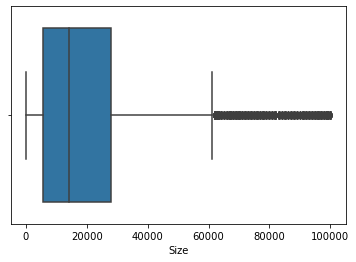

In [996]:
sns.boxplot(playstore_data.Size)

In [997]:
playstore_data.Size.describe()

count     10364.000000
mean      21037.820176
std       21108.924755
min           8.500000
25%        5700.000000
50%       14000.000000
75%       28000.000000
max      100000.000000
Name: Size, dtype: float64

In [998]:
# The outliers has been reset to the nearest limits
replace_outliers_to_nearest_limit(playstore_data,"Size",set_down_limit=True,down_limit=8.5)

-27750.0 61450.0


NOTE - downlimit is -27MB size can be negative or zero
- In the Size columns the uplimit and downlimit are between 8.5kb to 61MB <br>
 Why 8.5 kb ?? - Because its the smallest memory size nearest to 0
- Now in the box plot in the cell below we dont see any outliers

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size'>

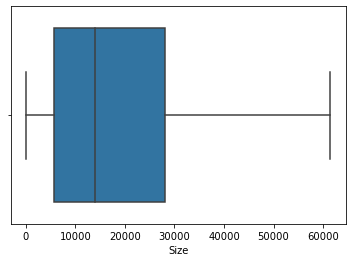

In [999]:
sns.boxplot(playstore_data.Size)

# Handling Rating outliers

In [1000]:
get_lower_upper_limit(playstore_data,"Rating")


(3.25, 5.25)

#### Note - Need to ignore the values more than 5 in the upper limit because max rating that a customer can give is 5
 - The uplimit and downlimit of ratings are 3.25 to 5
 - Box plot for the over all Rating will look something like the section below

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

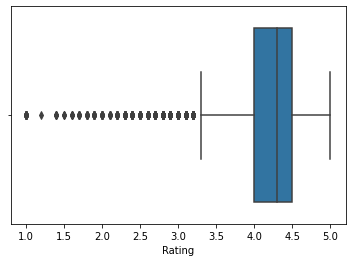

In [1001]:
sns.boxplot(playstore_data.Rating)

In [1002]:
# The outliers has been reset to the nearest limits
replace_outliers_to_nearest_limit(playstore_data,"Rating",set_up_limit=True,up_limit=5)


3.25 5.25


#### Note - Need to ignore the values more than 5 in the upper limit because max rating that a customer can give is 5
- In the Rating columns the uplimit and downlimit are between 3.25 to 5 <br>
- Now in the box plot in the cell below we dont see any outliers

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

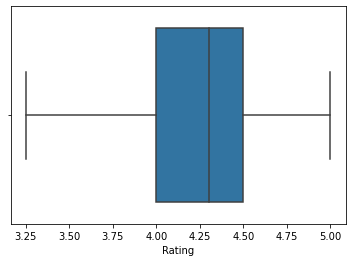

In [1003]:
sns.boxplot(playstore_data.Rating)

# Handling Reviews outliers

In [1011]:
get_lower_upper_limit(playstore_data,"Reviews")

(-69455.5, 115844.5)

#### Note - Need to ignore the negative value in the lower limit because min Reviews that an app can get is 0
 - The uplimit and downlimit of ratings are 0 and 115844
 - Box plot for the over all Review will look something like the section below

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

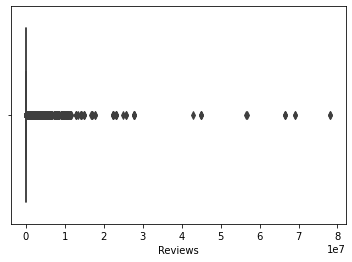

In [1012]:
sns.boxplot(playstore_data.Reviews)

In [1013]:
# The outliers has been reset to the nearest limits
replace_outliers_to_nearest_limit(playstore_data,"Reviews",set_down_limit=True,down_limit=0)


-69455.5 115844.5


#### Note - Need to ignore the negative value in the lower limit because min Reviews that an app can get is 0
 - The uplimit and downlimit of ratings are 0 and 115844
 - Now in the box plot in the cell below we dont see any outliers

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

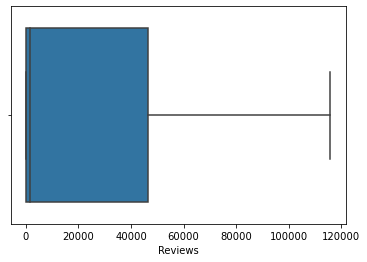

In [1018]:
sns.boxplot(playstore_data.Reviews)